# Digital Image Processing - Assignment 1

### Question 1

In [1]:
def sum_matrix(M):
    s = 0
    for i in M:
        s += sum(i)         
    return s


def max_matrix(M):
    m1 = M[0][0]
    for i in M:
        m2 = max(i)  
        m1 = max(m1, m2)
    return m1


def mean_matrix(M, m):
    return sum_matrix(M)/(m * m)


def median_matrix(M, m):
    ls = []
    for i in range(m):
        for j in range(m):
            ls.append(M[i][j])
    ls.sort()
    m *= m
    if m % 2 == 1:
        m += 1
    return ls[int(m/2)]


def mode_matrix(M, m):
    ls = []
    for i in range(m):
        for j in range(m):
            ls.append(M[i][j])
    ls.sort()

    i = 0
    L = []
    while i < len(ls) : 
        L.append(ls.count(ls[i])) 
        i += 1
    D1 = dict(zip(ls, L)) 
    D2 = {k for (k,v) in D1.items() if v == max(L) } 
    return D1, D2


def variance_matrix(M, m):
    mean = mean_matrix(M, m)
    var = 0
    for i in range(m):
        for j in range(m):
            var += ((M[i][j] - mean) * (M[i][j] - mean))
            
    return var/(m * m)

In [2]:
m = 5
matrix = [[5,4,3,2,1],[15,14,13,12,1],[21,20,19,18,17],[1,2,3,4,5],[10,9,8,7,6]]
matrix_sum = sum_matrix(matrix)
matrix_max = max_matrix(matrix)
matrix_mean = mean_matrix(matrix, m)
matrix_median = median_matrix(matrix, m)
matrix_freq, matrix_mode = mode_matrix(matrix, m)
matrix_varaince = variance_matrix(matrix, m)

print('Sum :', matrix_sum)
print('Max :', matrix_max)
print('Mean :', matrix_mean)
print('Median :', matrix_median)
print('Mode :', matrix_mode)
print(f'Variance :{matrix_varaince:.4f}')
print('Frequency :', matrix_freq)

Sum : 220
Max : 21
Mean : 8.8
Median : 8
Mode : {1}
Variance :42.1600
Frequency : {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 12: 1, 13: 1, 14: 1, 15: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}


### Question 2

In [3]:
import random

m = int(input('Enter size :'))
matrix = []

for i in range(m):
    flag = []
    for i in range(m):
        n = random.randint(0, 10)
        flag.append(n)
    matrix.append(flag)

matrix_sum = sum_matrix(matrix)
matrix_max = max_matrix(matrix)
matrix_mean = mean_matrix(matrix, m)
matrix_median = median_matrix(matrix, m)
matrix_freq, matrix_mode = mode_matrix(matrix, m)
matrix_varaince = variance_matrix(matrix, m)

print('Matrix :', matrix)
print('Sum :', matrix_sum)
print('Max :', matrix_max)
print('Mean :', matrix_mean)
print('Median :', matrix_median)
print('Mode :', matrix_mode)
print(f'Variance :{matrix_varaince:.4f}')
print('Frequency :', matrix_freq)

Enter size :4
Matrix : [[9, 3, 4, 1], [9, 8, 5, 4], [1, 2, 5, 4], [6, 6, 8, 9]]
Sum : 84
Max : 9
Mean : 5.25
Median : 5
Mode : {9, 4}
Variance :7.1875
Frequency : {1: 2, 2: 1, 3: 1, 4: 3, 5: 2, 6: 2, 8: 2, 9: 3}


### Question 3

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style()

def ploter(img):
    
    plt.figure(figsize = (40,4))
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')

In [5]:
def salt_and_pepper(img, n, perc = 7.5):
    
    avg = np.zeros(img.shape)
    amount = int(perc * img.size / 100) 
    
    for i in range(n):
        dummy = img.copy()
        x_salt, y_salt = [np.random.randint(0, i - 1, amount)
                  for i in img.shape]
        dummy[(x_salt,y_salt)] = 255

        x_pepper, y_pepper = [np.random.randint(0, i - 1, amount)
                  for i in img.shape]
        dummy[(x_pepper,y_pepper)] = 0
        
        avg += dummy
    avg = avg // n    
    avg = np.clip(avg, 0, 255)
    return avg
    
    
def gaussian(img, n):
    
    mean = 50
    var = 300
    sigma = var ** 0.5
    avg = np.zeros(img.shape)
    
    for i in range(n):
        gauss = np.random.normal(mean,sigma,(h,w))
        avg = avg + img + gauss
    
    avg = avg // n        
    avg = np.clip(avg, 0, 255)
    return avg

        
def speckle(img, n):
    
    avg = np.zeros(img.shape)
    
    for i in range(n):
        speckle = np.random.randn(h, w) * 20
        avg = avg + img + speckle
    
    avg = avg // n        
    avg = np.clip(avg, 0, 255)
    return avg

In [6]:
orig = cv.imread('lenna.jfif')
b, g, r = cv.split(orig)
gray = (0.3 * r) + (0.59 * g) + (0.11 * b)
h, w = gray.shape

gaussianed = gray.copy()
salted_peppered = gray.copy()
speckled = gray.copy()

for s in [5,10,15,20,25,30]:
    gaussianed = np.concatenate((gaussianed, gaussian(gray, s)), axis=1)
    salted_peppered = np.concatenate((salted_peppered, salt_and_pepper(gray, s)), axis=1)
    speckled = np.concatenate((speckled, speckle(gray, s)), axis=1)


##### Image + Gaussian Noise

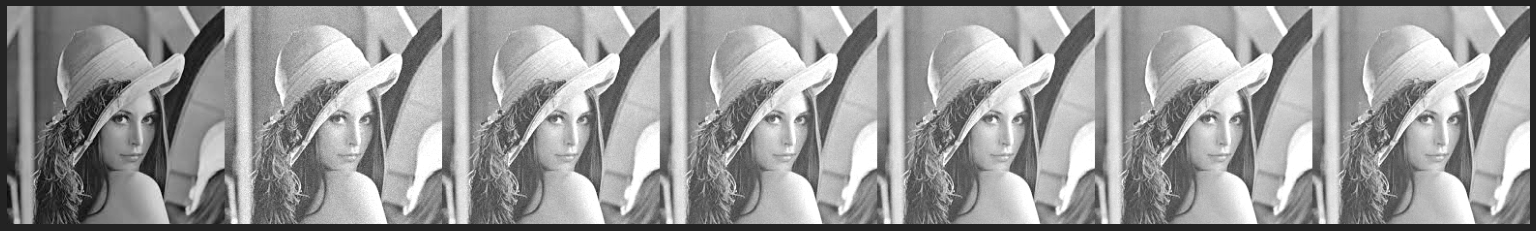

In [7]:
ploter(gaussianed)

##### Image + Salt and Pepper Noise

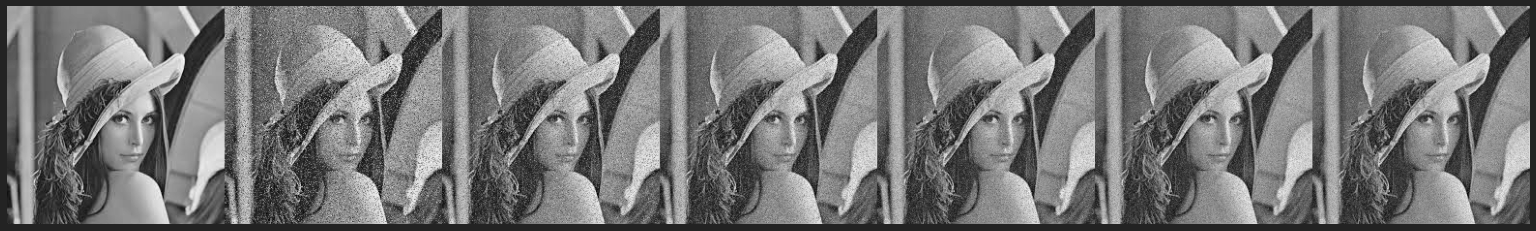

In [8]:
ploter(salted_peppered)

##### Image + Speckle Noise

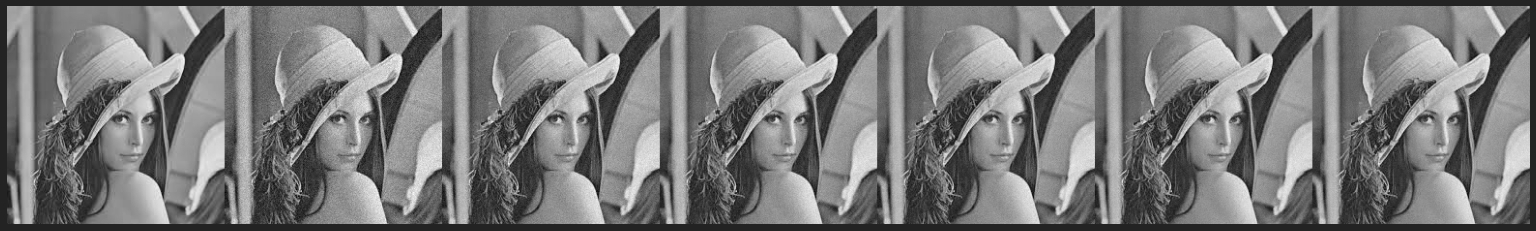

In [9]:
ploter(speckled)

The above set of images are order in the following order.<br>
1. Original Image
2. Average of 5 images
3. Average of 10 images
4. Average of 15 images
5. Average of 20 images
6. Average of 25 images <br> <br>
And it is visible that as more images are averaged, the noise becomes lesser. This phenomenon is more observable in gaussian noises added images.

### Question 4

(225, 225)


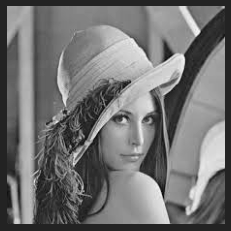

In [10]:
orig = cv.imread('lenna.jfif', 0)
h, w = orig.shape
print(orig.shape)
ploter(orig)

In [11]:
def bilinear_double(orig):
    n = 2
    scaled = np.ones(((n * h) + 1, (n * w) + 1)) * -1

    for row in range(h):
        for col in range(w):
            scaled[n * row][n * col] = orig[row][col]

    scaled[:, -1] = scaled[:, -(n + 1)]
    scaled[-1, :] = scaled[-(n + 1), :]
    
    for row in range(n * h):
        for col in range(n * w):

            if scaled[row][col] == -1 :
                row_q = row // n
                col_q = col // n

                row_top = row_q * n
                row_bot = row_top + n

                col_lft = col_q * n
                col_rgt = col_lft + n

                try:
                    row1_res = ((scaled[row_top][col_lft] * (col_rgt - col)) + (scaled[row_top][col_rgt] * (col - col_lft))) / n
                    row2_res =  ((scaled[row_bot][col_lft] * (col_rgt - col)) + (scaled[row_bot][col_rgt] * (col - col_lft))) / n
                    scaled[row][col] = ((row1_res * (row_bot - row)) + (row2_res * (row - row_top))) / n

                except:
                    pass

    scaled = scaled[:-1, :-1]
    return scaled

def bilinear_half(orig):
    
    descaled = np.zeros((h // 2, w // 2))

    for row in range(h):
        for col in range(w):
            try:
                descaled[row//2][col//2] = (orig[row][col] + orig[row + 1][col] + orig[row][col + 1] + orig[row + 1][col+ 1]) //4
            except:
                pass
    return descaled

Shape of the image is (450, 450)


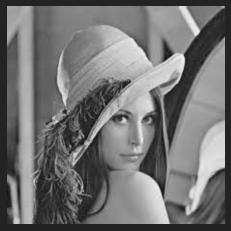

In [12]:
twice_manual = bilinear_double(orig)
twice_auto = cv.resize(orig, None, fx = 2, fy = 2, interpolation = cv.INTER_LINEAR)
print('Shape of the image is', twice_manual.shape)
ploter(twice_manual)

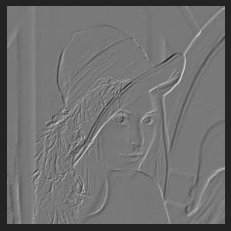

In [13]:
ploter(twice_auto - twice_manual)

Shape of the image is (112, 112)


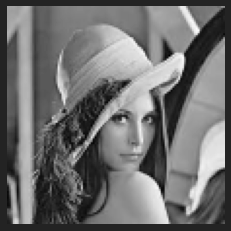

In [14]:
half_manual = bilinear_half(orig.astype(int))
half_auto = cv.resize(orig, None, fx = .5, fy = .5, interpolation = cv.INTER_LINEAR)
print('Shape of the image is', half_manual.shape)
ploter(half_manual)

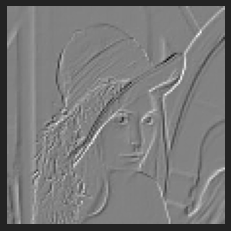

In [15]:
ploter(half_auto - half_manual)

The difference between the manually scaled and automatically scaled images are clearly visible along the edges in the images. This may be due different calculations that OpenCV considers while interpolating. May be also due to to the ambiguity that arises due to the extra pixel rows and columns along the image's edges (Due to this the image may be shifted by a pixel or two, thus giving strong edge differences). 

### Question 5

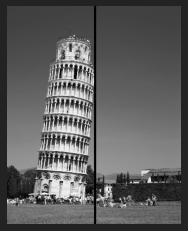

In [16]:
orig = cv.imread('LTP.jpg', 0)
orig = cv.resize(orig, None, fx = .25, fy = .25, interpolation = cv.INTER_LINEAR)
h, w = orig.shape
dummy = orig.copy()
dummy[0 : h, w//2 : (w//2 + 4)] = 0

ploter(dummy)

Image source : https://www.britannica.com/topic/Leaning-Tower-of-Pisa <br>
<br>
Notice that the straight black line is not parallel to the tower. Our goal would be to rotate the Leaning tower of pissa in order to make it perperndicular

In [17]:
def rotate(img, angle):

    m1 = np.array([[np.cos(angle), -1 * np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    m2 = np.linalg.inv(m1)
    h, w = img.shape
    rotated = np.ones((h, w)) * -1

    for row in range(h):
        for col in range(w):    
            x, y = np.dot(m1, np.array([col, row]))
            x = int(np.round(x))
            y = int(np.round(y))            
            
            if x >= 0 and y >= 0 and x < w and y < h :
                rotated[y][x] = img[row][col]
                
    for row in range(h):
        for col in range(w): 
            if rotated[row][col] == -1 :
                x, y = np.dot(m2, np.array([col, row]))
                if x >= 0 and y >= 0 and x < w - 1 and y < h - 1 : 
                    ltx, lty = np.array([int(np.floor(x)), int(np.floor(y))]) 
                    rtx, rty = np.array([int(np.floor(x)), int(np.ceil(y))])
                    lbx, lby = np.array([int(np.ceil(x)), int(np.floor(y))]) 
                    rbx, rby = np.array([int(np.ceil(x)), int(np.ceil(y))]) 
                    try:
                        rotated[row][col] = ((img[ltx, lty] * (rbx - x) * (rby - y)) + (img[rtx, rty] * (x - lbx) * (lby - y))
                                          + (img[lbx, lby] * (rtx - x) * (y - rty)) + (img[rbx, rby] * (x - ltx) * (y - lty)))
                    except:
                        pass
    return rotated

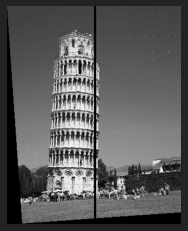

In [18]:
deg = -4
rtd = rotate(orig, (deg * np.pi) / 180)
rtd[0 : h, w//2 : (w//2 + 4)] = 0
ploter(rtd)

Angle of slant: 3.97 degrees ( source : https://en.wikipedia.org/wiki/Leaning_Tower_of_Pisa)

### Question 6

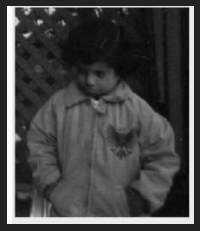

In [19]:
img = cv.imread('pout-dark.jpg', 0)
ploter(img)

In [20]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

cdf = np.zeros(len(hist))
cdf[0] = hist[0]

for i in range(1,len(hist)):
    cdf[i] = cdf[i - 1] + hist[i]

hv = ((cdf - min(cdf)) * 255) // (img.size - min(cdf))

In [21]:
equ = img.copy()

for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            equ[row][col] = hv[equ[row][col]]
            
hist2,bins = np.histogram(equ.ravel(),256,[0,256])

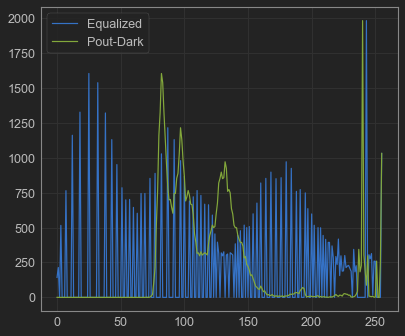

In [22]:
plt.plot(hist2)
plt.plot(hist)
plt.legend(['Equalized', 'Pout-Dark'])
plt.show()

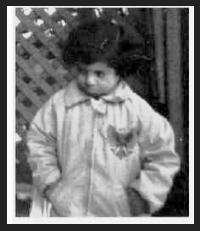

In [23]:
ploter(equ)

### Question 7

In [24]:
dark = cv.imread('pout-dark.jpg', 0)
bright = cv.imread('pout-bright.jpg', 0)

In [25]:
hist_d,bins = np.histogram(dark.ravel(),256,[0,256])

cdf_d = np.zeros(len(hist_d))
cdf_d[0] = hist_d[0]

for i in range(1,len(hist_d)):
    cdf_d[i] = cdf_d[i - 1] + hist_d[i]

hv_d = ((cdf_d - min(cdf_d)) * 255) // (dark.size - min(cdf_d))

In [26]:
hist_b,bins = np.histogram(bright.ravel(),256,[0,256])

cdf_b = np.zeros(len(hist_b))
cdf_b[0] = hist_b[0]

for i in range(1,len(hist_b)):
    cdf_b[i] = cdf_b[i - 1] + hist_b[i]

hv_b = ((cdf_b - min(cdf_b)) * 255) // (bright.size - min(cdf_b))

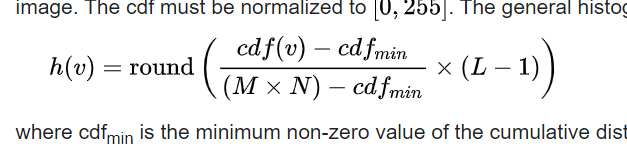

In [27]:
op = dark.copy()
i = 0
pix = np.zeros(len(hv_d))

for d in hv_d:
    dif = abs(hv_b - d)
    pix[i] = np.argmin(dif)
    i += 1
    
for row in range(op.shape[0]):
        for col in range(op.shape[1]):
                op[row][col] = pix[op[row][col]]

The histogram matched image of input image


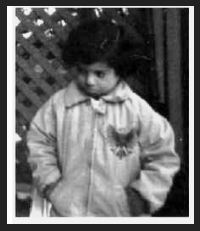

In [28]:
print('The histogram matched image of input image')
ploter(op)

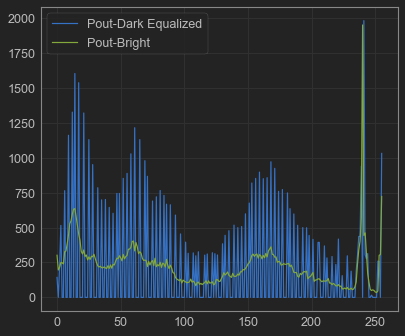

In [29]:
hist1,bins = np.histogram(bright.ravel(),256,[0,256])
hist2,bins = np.histogram(op.ravel(),256,[0,256])

plt.plot(hist2)
plt.plot(hist1)
plt.legend(['Pout-Dark Equalized', 'Pout-Bright'])
plt.show()